<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 4. <b>Статистика и </b> <span style="font-weight:bold; color:green">NumPy/SciPy</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><span style="color:red; font-weight:bold">ВНИМАНИЕ!</span> Варианты могут не совпадать с предыдущими ДЗ</p>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Oops" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Задача 1.</b> Доверительный интервал</p>

<p>После присоединения Криптона было решено оценить в рублях среднюю стоимость бензина в его административном центре. Для этого случайно выбрали 50 заправок (далее - АЗС) из 1000 (значения приведены в файле oil_price_Krypton.csv). Определить с уверенностью в 95% границы, в которых заключено среднее значение стоимости бензина в административном центре, т.е. построить 95% доверительный интерал для средней цены на бензин? Постройте график по данным выборки с доверительным интервалом.</p>

<p><i>Подготовка (изменен шрифт для matplotlib для отображения русских букв):</i></p>

In [3]:
import pandas as pd
from math import sqrt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family='Verdana')
%matplotlib inline

<p><i>Вычисляем отклонение, затем правую/левую границы интервала:</i></p>

In [4]:
df_prices = pd.read_csv('oil_price_Krypton.csv')
alpha = 0.95
se = sqrt(df_prices.var(ddof=0)/df_prices.count())
z = np.around(stats.norm.ppf(0.5+alpha/2), decimals=2)
mean = float(df_prices.mean())
left_eval = mean-z*se
right_eval = mean+z*se

<p><i>Графически строим доверительный интервал:</i></p>

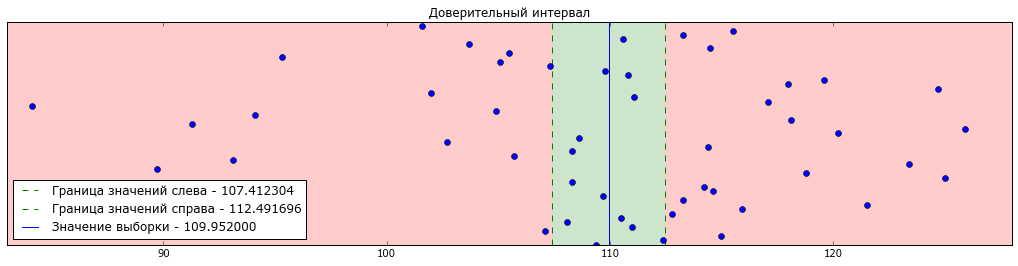

In [5]:
#Предварительные параметры
plt.figure(1, figsize=[18,4])
plt.xlim(83, 128)
plt.axes().get_yaxis().set_visible(False)

#Указываем значения
plt.axvline(right_eval, color="green", linestyle="--")
plt.axvline(left_eval, color="green", linestyle="--")
plt.axvline(mean, color="b", linestyle="-")
plt.plot(df_prices, df_prices.index, 'o')

#Наводим красоту (закрашиваем обоасти)
plt.axvspan(83, left_eval, color='r', alpha=0.2, lw=0)
plt.axvspan(right_eval, 128, color='r', alpha=0.2, lw=0)
plt.axvspan(right_eval, left_eval, color='g', alpha=0.2, lw=0)

#Обозначения
plt.title('Доверительный интервал')
plt.legend(['Граница значений слева - %f'%left_eval, 'Граница значений справа - %f'%right_eval, 'Значение выборки - %f'%mean],
           loc=0)

plt.show()

<p><b>Задача 2.</b> Гипотеза</p>

<p>Решить двумя способами, как показано в Class_6_Examples_CI_Hyp.ipnb, т.е. самостоятельно по формулам и с использованием stats.ttest</p>

<p><b><i>Вариант 1</i></b></p>

<p>До присоединения Криптона в его административном центре средняя цена бензина в переводе на рубли была 90 рублей. Используя данные предыдущей выборки (значения приведены в файле oil_price_Krypton.csv), изменилась ли средняя цена после, т.е. постройте и оцените нулевую гипотезу при уровне значимости 0.05? Постройте график по данным выборки с указанием p-value и уровня значимости.</p>

In [6]:
#Ваш код

<p><b><i>Вариант 2</i></b></p>

<p>В административном центре Криптона функционируют АЗС двух компнаний. Было решено оценить отличаются ли средние цены на бензин у этих компаний. Для этого случайно выбраны 50 территориальных единиц из 500, в которых присутвуют АЗС двух компаний (значения приведены в файле oil_price_two_companies.csv). Используя данные выборок, постройте и оцените нулевую гипотезу при уровне значимости 0.05? Постройте график по данным выборки с указанием p-value и уровня значимости.</p>   

<p><i>Предварительные расчеты параметров выборки:</i></p>

In [7]:
alpha = 0.05

df_prices_two = pd.read_csv('oil_price_two_companies.csv')
company_1 = df_prices_two['OilPrice_Company_1']
company_2 = df_prices_two['OilPrice_Company_2']
mean_1, std_1, n_1 = company_1.mean(), company_1.std(ddof=1), company_1.count()
mean_2, std_2, n_2 = company_2.mean(), company_2.std(ddof=1), company_2.count()

<p><i>Нулевая гипотеза - средние значения не отличаются.<br>Альтернативная гипотеза - средние значения отличаются.</i></p>
<p>$$H_0: \mu_{1}-\mu_{2}=0$$<p>
<p>$$H_A: \mu_{1}-\mu_{2} \neq 0$$<p>
<p><i>Так как нам не известна дисперсия генеральной совокупности, мы используем несмещенную выборочную; исследуемый нами признак имеет t-распределение.</i></p>

#### Способ 1. Расчет вручную.

<p><i>Расчет ведется по способу, предложенному <a href='http://www.kean.edu/~fosborne/bstat/07b2means.html'>здесь</a>, пункт "Sampling from normally distributed populations with unknown variances".</i></p>
<p><i>Подсчет необходимых статистических значений:</i></p>

In [8]:
var_p = ((n_1-1)*(std_1**2)+(n_2-1)*(std_2**2))/(n_1+n_2-2)
se = sqrt(var_p/n_1+var_p/n_2)
df = (n_1+n_2-2)

t = (mean_1-mean_2)/se
pvalue = 2 * (stats.t.cdf(-abs(t), df=df))

In [9]:
def conclusion(alpha, pvalue):
    if alpha > pvalue:
        print("alpha > p-value")
        print("Отказываемся от нулевую гипотезы в пользу альтернативной")
    else:
        print("alpha <= p-value")
        print("Принимаем нулевую гипотезу (не отказываемся от нулевой гипотезы)")
        
conclusion(alpha, pvalue)

alpha <= p-value
Принимаем нулевую гипотезу (не отказываемся от нулевой гипотезы)


#### Способ 2. Расчет с помощью stats.ttest*

In [16]:
tvalue, pvalue_t = stats.ttest_ind(company_1, company_2, equal_var=False)
conclusion(alpha, pvalue_t)

alpha <= p-value
Принимаем нулевую гипотезу (не отказываемся от нулевой гипотезы)


<p><i>Строим график:</i></p>

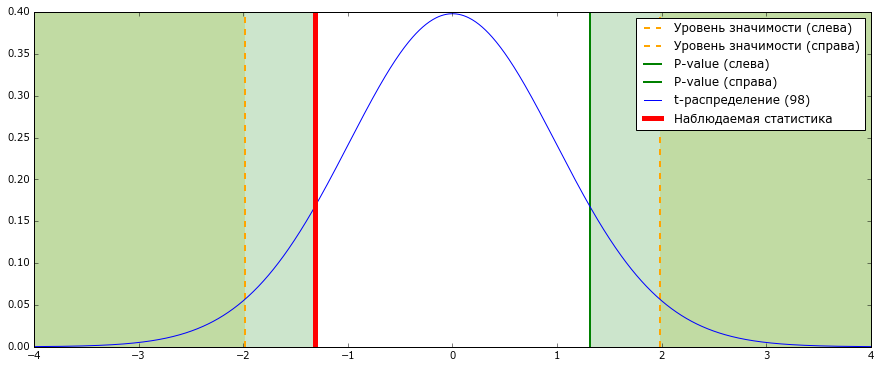

In [21]:
#Предварительные параметры
plt.figure(1, figsize=[15, 6])
plt.xlim(-4, 4)

#Строим критическую область
sign_lev_pl = abs(stats.t.ppf(alpha/2, df=df))
plt.axvline(-sign_lev_pl, lw=2, color="orange", linestyle="--")
plt.axvline(sign_lev_pl, lw=2, color="orange", linestyle="--")

#Строим область p-value
p_val_pl = abs(stats.t.ppf(pvalue_t/2, df=df))
plt.axvline(-p_val_pl, lw=2, color="green", linestyle="-")
plt.axvline(p_val_pl, lw=2, color="green", linestyle="-")

#Строим кривую t-распределения
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)
plt.plot(x,y)

#Наводим красоту (закрашиваем обоасти)
plt.axvspan(sign_lev_pl, 4, color='y', alpha=0.2, lw=0)
plt.axvspan(p_val_pl, 4, color='g', alpha=0.2, lw=0)
plt.axvspan(-4, -sign_lev_pl, color='y', alpha=0.2, lw=0)
plt.axvspan(-4, -p_val_pl, color='g', alpha=0.2, lw=0)

#Обозначаем нашу статистику
plt.axvline(tvalue, lw=5, color="r")

#Подписи
plt.legend(['Уровень значимости (слева)', 'Уровень значимости (справа)', 'P-value (слева)', 'P-value (справа)', 
            't-распределение (%i)' % df, 'Наблюдаемая статистика'])

plt.show()

<p><b><i>Вариант 3</i></b></p>

<p>После присоединения Криптона было решено сравнить среднюю стоимость бензина в его административном центре и в центральном федеральном округе (далее - ЦФО). Для этого случайно выбрали 50 заправок на Криптоне и 60 в ЦФО (значения приведены в файле oil_price_two_districts.csv). Используя данные выборок, отличается ли средняя цена на Криптоне и в ЦФО при уровне значимости 0.05, т.е. постройте и оцените нулевую гипотезу? Постройте график по данным выборки с указанием p-value и уровня значимости.</p>

In [18]:
#Ваш код